In [240]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [241]:
data=pd.read_csv(r'E:\CAPSTONE\Dataset.csv')

In [242]:
data.shape #Get row and column count

(129880, 24)

In [243]:
data.info() #basic data information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 129880 non-null  int64  
 1   Gender                             129880 non-null  object 
 2   Customer Type                      129880 non-null  object 
 3   Age                                129880 non-null  int64  
 4   Type of Travel                     129880 non-null  object 
 5   Class                              129880 non-null  object 
 6   Flight Distance                    129880 non-null  int64  
 7   Inflight wifi service              129880 non-null  int64  
 8   Departure/Arrival time convenient  129880 non-null  int64  
 9   Ease of Online booking             129880 non-null  int64  
 10  Gate location                      129880 non-null  int64  
 11  Food and drink                     1298

In [244]:
data["satisfaction"]=[1 if each=="satisfied" else 0 for each in data.satisfaction] 

In [245]:
data.head(10)

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,...,5,5,5,5,2,5,5,50,44.0,1
1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,...,4,4,4,4,3,4,5,0,0.0,1
2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,...,2,4,1,3,2,2,2,0,0.0,0
3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,...,1,1,1,1,3,1,4,0,6.0,1
4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,...,2,2,2,2,4,2,4,0,20.0,1
5,39177,Male,Loyal Customer,16,Business travel,Eco,311,3,3,3,...,5,4,3,1,1,2,5,0,0.0,1
6,79433,Female,Loyal Customer,77,Business travel,Business,3987,5,5,5,...,5,5,5,5,4,5,3,0,0.0,1
7,97286,Female,Loyal Customer,43,Business travel,Business,2556,2,2,2,...,4,4,4,4,5,4,3,77,65.0,1
8,27508,Male,Loyal Customer,47,Business travel,Eco,556,5,2,2,...,5,2,2,5,3,3,5,1,0.0,1
9,62482,Female,Loyal Customer,46,Business travel,Business,1744,2,2,2,...,4,4,4,4,5,4,4,28,14.0,1


# MISSING DATA AND IMPUTATION

In [246]:
total=data.isnull().sum()
print(total)

id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
satisfaction                           0
dtype: int64


In [247]:
data['Arrival Delay in Minutes'] = data['Arrival Delay in Minutes'].fillna(data['Arrival Delay in Minutes'].mean())

total=data.isnull().sum()
print(total)

id                                   0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64


# OUTLIER DETECTION

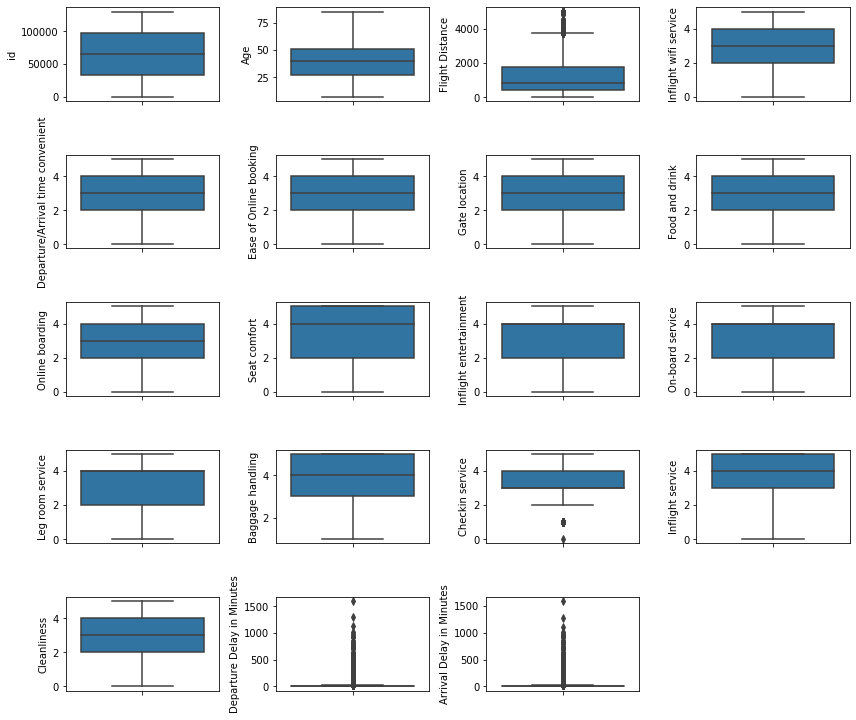

In [248]:
numerical_features = data.select_dtypes(exclude=['object']).drop(["satisfaction"],axis=1).copy()
numerical_features.columns

fig = plt.figure(figsize=(12,18))
for i in range(len(numerical_features.columns)):
    fig.add_subplot(9,4,i+1)
    sns.boxplot(y=numerical_features.iloc[:,i])

plt.tight_layout()
plt.show()

In [249]:
def detect_outliers(df,features):
    outlier_indices=[]
    
    for c in features:
        # 1st quartile
        Q1=np.percentile(df[c],25)
        
        # 3rd quartile
        Q3=np.percentile(df[c],75)
        
        # IQR
        IQR= Q3-Q1
        
        # Outlier Step
        outlier_step= IQR * 1.5
        
        # Detect outlier and their indeces 
        outlier_list_col = df[(df[c]< Q1 - outlier_step)|( df[c] > Q3 + outlier_step)].index
        
        # Store indices 
        outlier_indices.extend(outlier_list_col)
    
    outliers_indices = Counter(outlier_indices)
    multiple_outliers = list(i for i , v in outliers_indices.items() if v>2 )
    return multiple_outliers

In [250]:
data.loc[detect_outliers(data,[ 'Age', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes',
       'Arrival Delay in Minutes'])]

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
145,7237,Female,Loyal Customer,53,Business travel,Business,3769,3,1,5,...,2,4,3,4,1,2,1,180,178.0,0
853,4380,Female,Loyal Customer,52,Business travel,Business,3894,1,1,1,...,5,5,5,3,1,5,2,0,50.0,1
946,103160,Male,Loyal Customer,40,Business travel,Business,3799,2,2,5,...,5,5,5,5,3,5,3,81,96.0,1
1279,37388,Female,Loyal Customer,32,Business travel,Business,3880,3,3,3,...,3,2,5,1,5,2,5,146,171.0,1
1358,129730,Female,Loyal Customer,48,Business travel,Business,3801,4,4,2,...,4,4,4,4,3,4,2,100,94.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129665,1835,Male,Loyal Customer,30,Personal Travel,Eco,408,3,2,3,...,2,3,2,2,1,1,2,83,75.0,0
129670,36593,Male,Loyal Customer,46,Business travel,Eco,1197,1,2,2,...,4,3,3,3,1,1,1,260,263.0,0
129702,58549,Female,disloyal Customer,34,Business travel,Eco,1514,3,4,4,...,3,3,5,2,1,2,3,58,63.0,0
129845,55713,Male,Loyal Customer,18,Personal Travel,Eco,895,4,5,4,...,3,5,4,5,1,3,1,212,206.0,0


In [251]:
data = data.drop(detect_outliers(data,[ 'Age', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes',
       'Arrival Delay in Minutes']),axis = 0).reset_index(drop = True)

In [252]:
data.shape


(127533, 24)

In [253]:
data = data.drop('id', axis=1) #dropping id column



In [254]:
data.shape

(127533, 23)

# Visualization

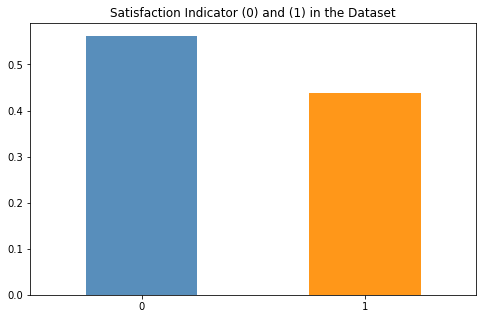

In [255]:
fig = plt.figure(figsize = (8,5))
data.satisfaction.value_counts(normalize = True).plot(kind='bar', color= ['steelblue','darkorange'], alpha = 0.9, rot=0)
plt.title('Satisfaction Indicator (0) and (1) in the Dataset')
plt.show()

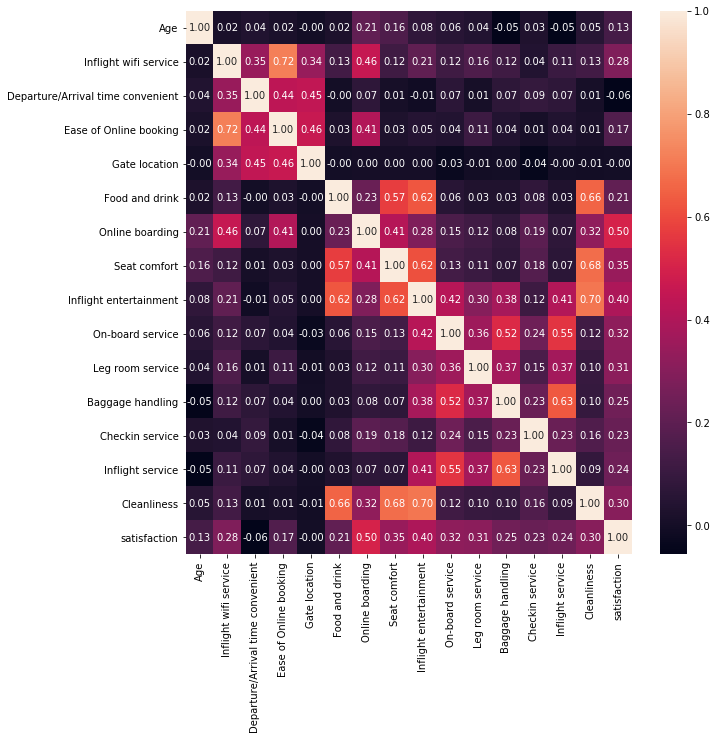

In [256]:
plt.figure(figsize=(10,10))
list1=["Age",'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness',"satisfaction"]
sns.heatmap(data[list1].corr(),annot=True,fmt=".2f")
plt.show()

In [257]:
def plot_hist(variable):
    plt.figure(figsize=(9,3))
    plt.hist(data[variable],bins=50)
    plt.xlabel(variable)
    plt.ylabel("Fruequency")
    plt.title("{} distribution with histogram".format(variable))
    plt.show()
    
    

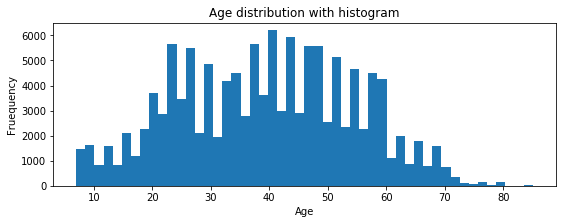

None


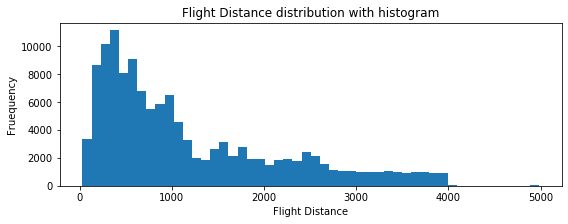

None


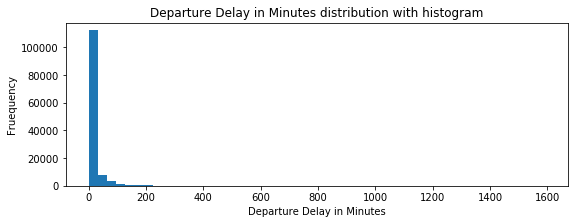

None


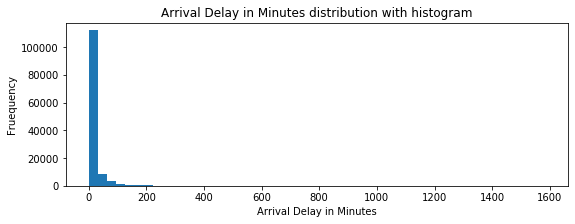

None


In [258]:
numericVar=["Age", "Flight Distance", "Departure Delay in Minutes", "Arrival Delay in Minutes"]
for n in numericVar:
    print(plot_hist(n))

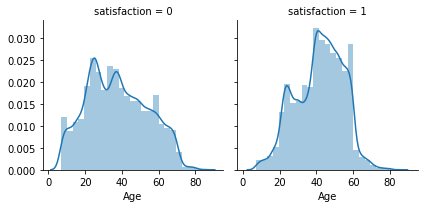

In [259]:
g= sns.FacetGrid(data,col="satisfaction")
g.map(sns.distplot,"Age",bins=25)
plt.show()

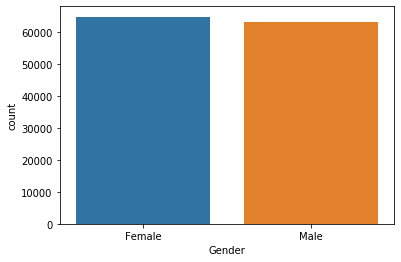

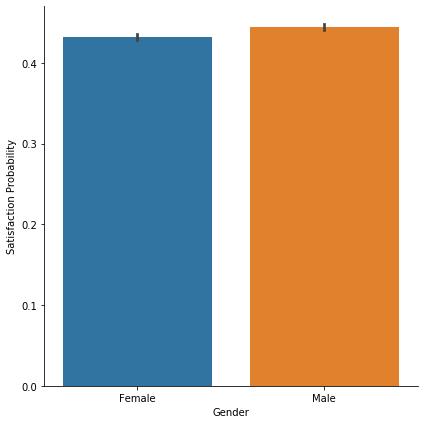

In [260]:
sns.countplot(x="Gender",data=data)

g=sns.catplot(x="Gender",y="satisfaction",data=data,kind="bar",size=6)
g.set_ylabels("Satisfaction Probability")
plt.show()

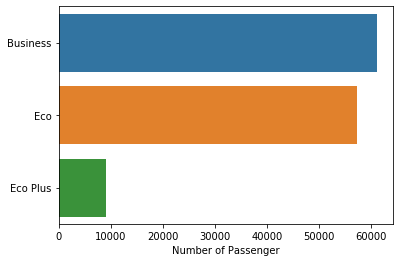

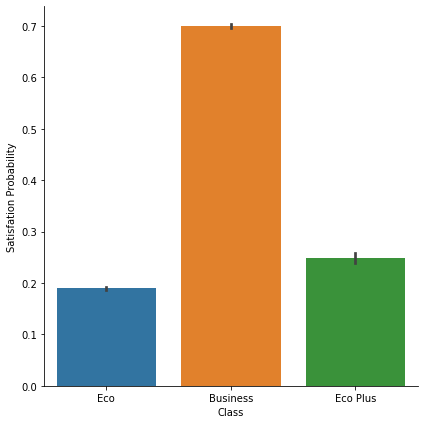

In [261]:
sns.barplot(x=data.Class.value_counts().values,y=data.Class.value_counts().index)
plt.xlabel("Number of Passenger")
plt.show()

g=sns.factorplot(x="Class",y="satisfaction",data=data,kind="bar",size=6)
g.set_ylabels("Satisfation Probability")
plt.show()


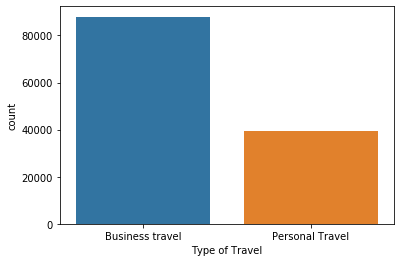

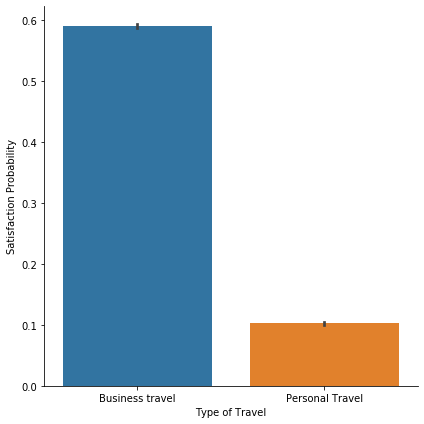

In [262]:
sns.countplot(x="Type of Travel",data=data)

g=sns.factorplot(x="Type of Travel",y="satisfaction",data=data,kind="bar",size=6)
g.set_ylabels("Satisfaction Probability")
plt.show()

In [263]:
def bar_plot(variable):
    
    var=data[variable]
    var_Value=var.value_counts()
    
    #visualize
    plt.figure(figsize=(9,3))
    plt.bar(var_Value.index,var_Value.values)
    
    plt.xlabel("Passengers Score")
    plt.ylabel("Frequency")
    plt.title(variable)
    plt.show()
    print("{}: \n {}".format(variable,var_Value))

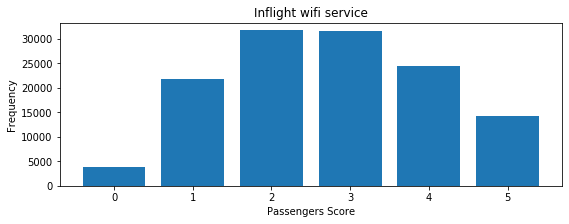

Inflight wifi service: 
 2    31726
3    31519
4    24409
1    21793
5    14209
0     3877
Name: Inflight wifi service, dtype: int64


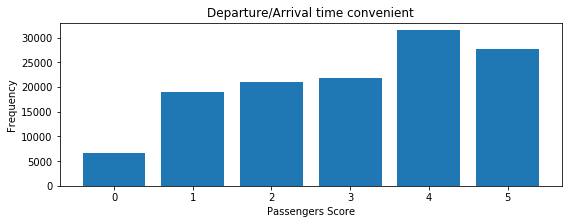

Departure/Arrival time convenient: 
 4    31426
5    27630
3    21857
2    21065
1    18953
0     6602
Name: Departure/Arrival time convenient, dtype: int64


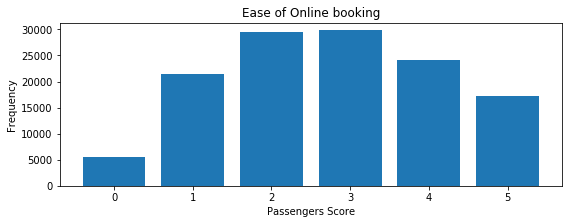

Ease of Online booking: 
 3    29793
2    29502
4    24040
1    21447
5    17151
0     5600
Name: Ease of Online booking, dtype: int64


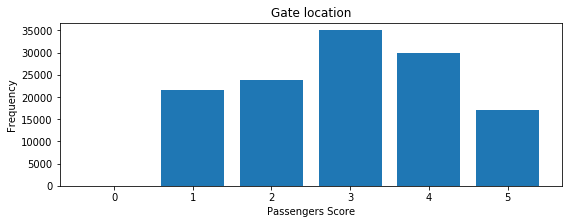

Gate location: 
 3    35001
4    29868
2    23915
1    21606
5    17142
0        1
Name: Gate location, dtype: int64


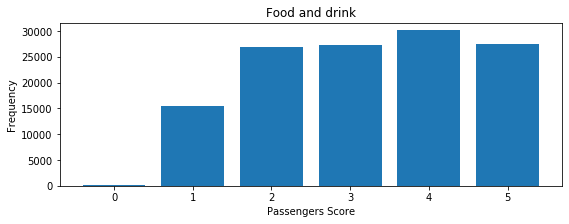

Food and drink: 
 4    30130
5    27576
3    27288
2    26870
1    15552
0      117
Name: Food and drink, dtype: int64


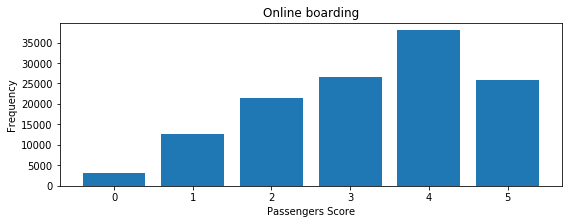

Online boarding: 
 4    37955
3    26566
5    25807
2    21520
1    12636
0     3049
Name: Online boarding, dtype: int64


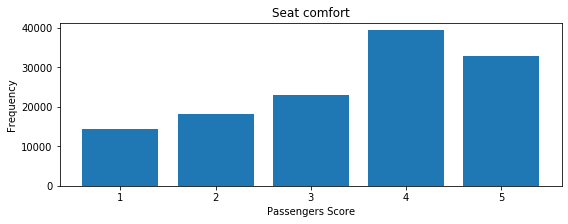

Seat comfort: 
 4    39272
5    32806
3    22849
2    18187
1    14419
Name: Seat comfort, dtype: int64


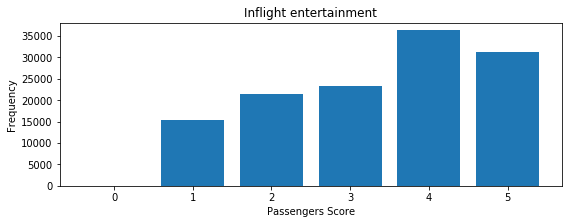

Inflight entertainment: 
 4    36243
5    31115
3    23321
2    21518
1    15318
0       18
Name: Inflight entertainment, dtype: int64


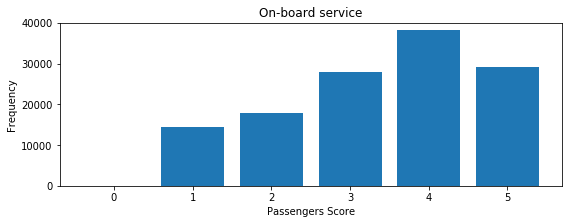

On-board service: 
 4    38130
5    29183
3    28002
2    17845
1    14368
0        5
Name: On-board service, dtype: int64


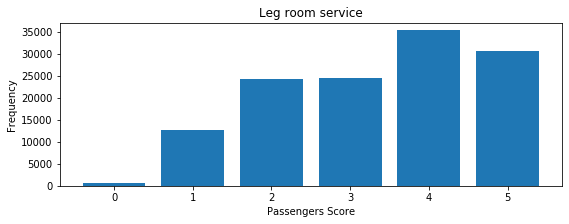

Leg room service: 
 4    35247
5    30485
3    24494
2    24142
1    12578
0      587
Name: Leg room service, dtype: int64


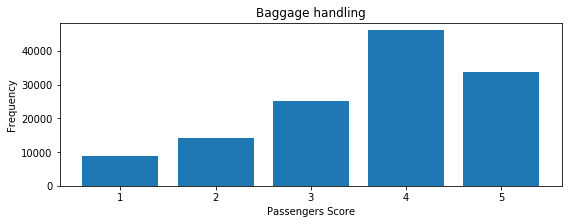

Baggage handling: 
 4    46002
5    33560
3    25133
2    14020
1     8818
Name: Baggage handling, dtype: int64


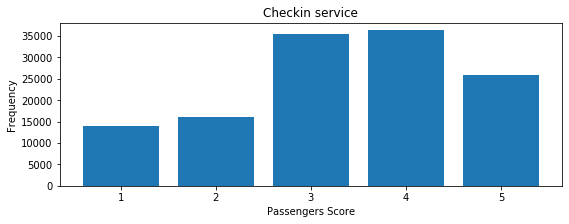

Checkin service: 
 4    36237
3    35362
5    25805
2    16062
1    14067
Name: Checkin service, dtype: int64


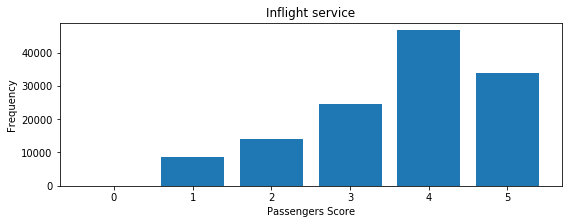

Inflight service: 
 4    46628
5    33782
3    24588
2    13922
1     8608
0        5
Name: Inflight service, dtype: int64


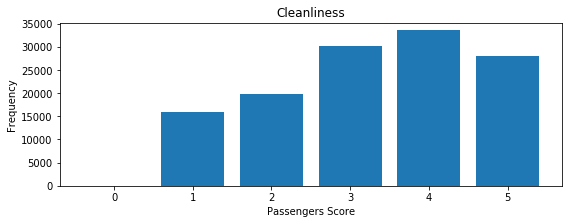

Cleanliness: 
 4    33545
3    30170
5    28103
2    19733
1    15969
0       13
Name: Cleanliness, dtype: int64


In [264]:
category1=["Inflight wifi service", "Departure/Arrival time convenient", "Ease of Online booking", "Gate location", "Food and drink", "Online boarding", "Seat comfort", "Inflight entertainment", "On-board service", "Leg room service", "Baggage handling", "Checkin service", "Inflight service", "Cleanliness",]
for c in category1:
    bar_plot(c)

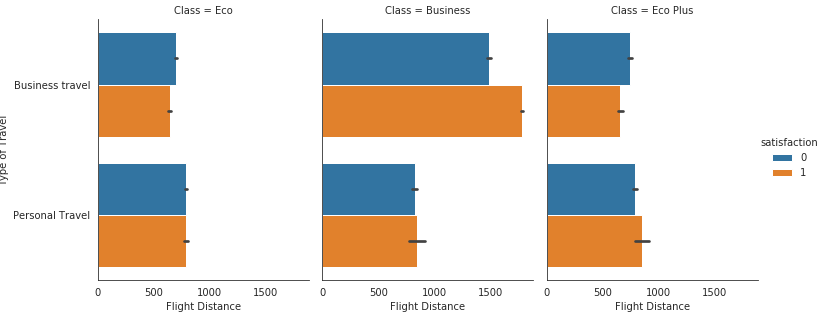

In [265]:
with sns.axes_style('white'):
    g = sns.catplot(x="Flight Distance", y="Type of Travel", hue="satisfaction", col="Class", data=data, kind="bar", height=4.5, aspect=.8)

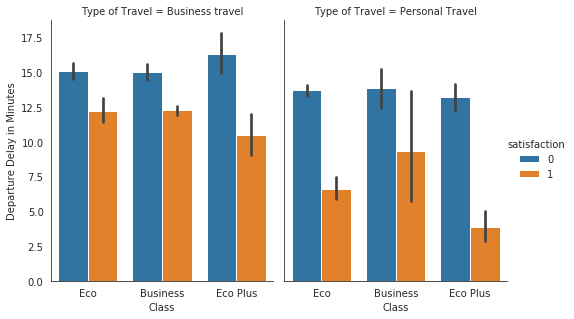

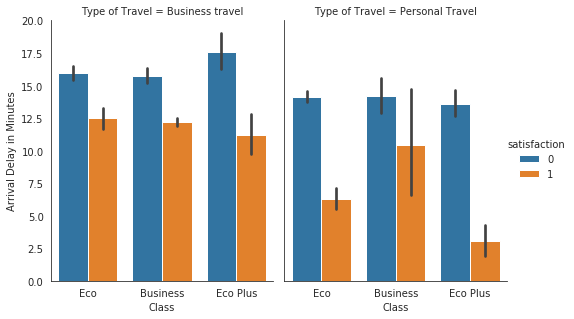

In [266]:
with sns.axes_style('white'):
    g = sns.catplot(x="Class", y="Departure Delay in Minutes", hue="satisfaction", col="Type of Travel", data=data, kind="bar", height=4.5, aspect=.8)
    g = sns.catplot(x="Class", y="Arrival Delay in Minutes", hue="satisfaction", col="Type of Travel", data=data, kind="bar", height=4.5, aspect=.8)

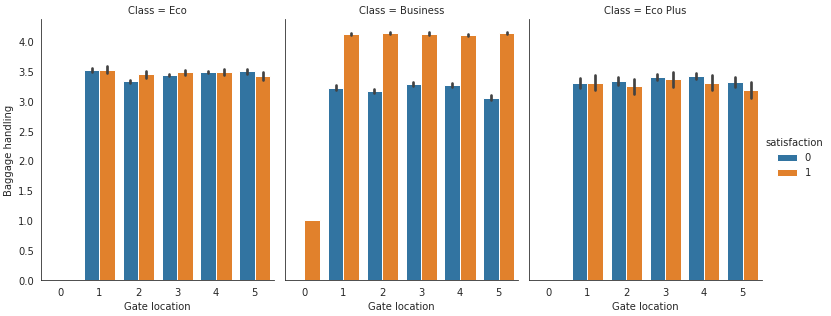

In [267]:
with sns.axes_style('white'):
    g = sns.catplot(x="Gate location", y="Baggage handling", hue="satisfaction", col="Class", data=data, kind="bar", height=4.5, aspect=.8)

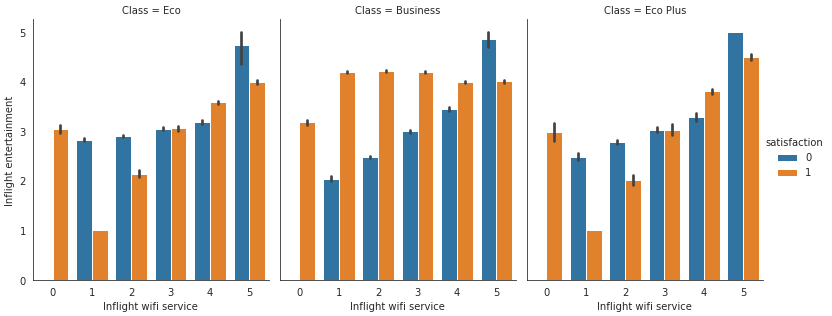

In [268]:
with sns.axes_style('white'):
    g = sns.catplot(x="Inflight wifi service", y="Inflight entertainment", hue="satisfaction", col="Class", data=data, kind="bar", height=4.5, aspect=.8)

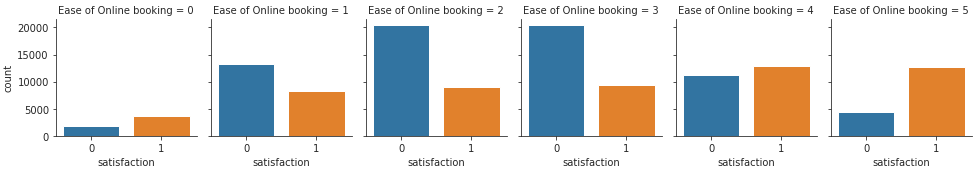

In [269]:
with sns.axes_style(style='ticks'):
    g = sns.catplot("satisfaction", col="Ease of Online booking", col_wrap=6, data=data, kind="count", height=2.5, aspect=.9)



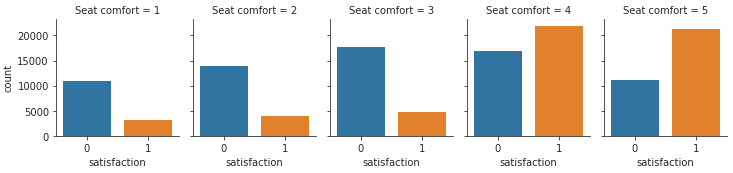

In [270]:
with sns.axes_style(style='ticks'):
    g = sns.catplot("satisfaction", col="Seat comfort", col_wrap=6, data=data, kind="count", height=2.5, aspect=.8)

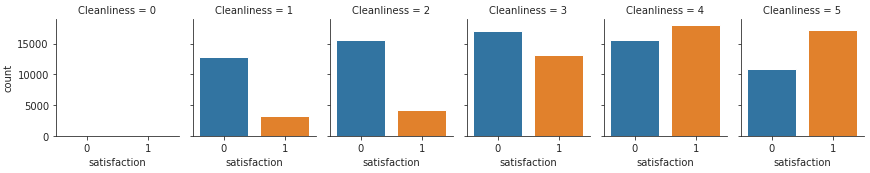

In [271]:
with sns.axes_style(style='ticks'):
    g = sns.catplot("satisfaction", col="Cleanliness", col_wrap=6, data=data, kind="count", height=2.5, aspect=.8)

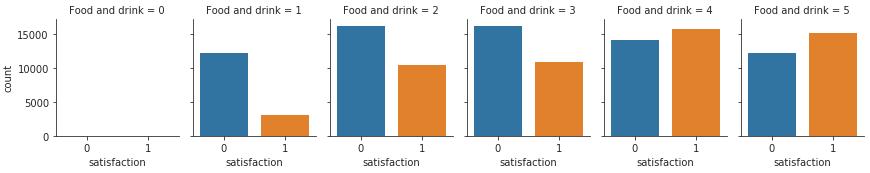

In [272]:
with sns.axes_style(style='ticks'):
    g = sns.catplot("satisfaction", col="Food and drink", col_wrap=6, data=data, kind="count", height=2.5, aspect=.8)

# Insights from data:-

Gender: It is observed that gender-wise distribution of dissatisfied and satisfied customers are quite same. For both male and female passengers, no. of dissatisfied customers are on the higher side compared to no. of satisfied customers.

Customer Type: Loyal passengers are very high in number. Even among loyal passengers, the ratio of satisfied and dissatidfied ones are almost 49:51.

The plot shows a distribution of around 55%:45% between neutral/dissatisfied passengers and satisfied passengers respectively. So the data is quite balanced and it does not require any special treatment/resampling.

Age: From age 7-to-38 and from age 61-to-79, quotient of dissatisfied passengers is very high compared to satisfied passengers. On the contrary, in age range 39-60, quotient of satisfied passengers is higher compared to dissatisfied passengers.

Type of Travel, Class, Flight Distance: For business travel in business class category, the number of satisfied passengers are quite on the higher side for longer flight distance. For other combinations, there is almost equal distribution of satisfied and dissatisfied passengers.

Departure Delay, Arrival Delay grouped by Type of Travel: For personal travel (specially Eco Plus and Eco), the no. of dissatisfied passengers are really high when arrival delay in minutes is high. Now, this is quite obvious. By minute comparison, all combinations have higher no. of dissatisfied passengers compared to no. of satisfied passengers.

Baggage Handling, Gate Location grouped by Class: For business class, it is observed that all gate locations have higher no. of dissatisfied passengers when baggage handling is not done perfectly well (rating <= 4). For Eco Plus, when the gate location is 1 and for Eco, when the gate location is 2, even when the baggages are handled in a mediocre way (rating in range 2.0 - 4.0), passengers remained dissatisfied.

Ease of Online Booking, Seat Comfort, Cleanliness, Food and Drink: For all of these features, maximum no. of satisfied passengers belong to the category of 4 and 5 rating givers. Below rating 4, passengers are mostly dissatisfied.

Inflight Entertainment, Inflight wi-fi Service grouped by Class: It is interesting to find that Eco Plus passengers are mostly satisfied without in-flight wi-fi service (rating 0) and medium level of in-flight entertainment (rating 2 - 4). For Business class passengers, only highest level of in-flight entertainment (rating 5) can make them satisfied. For Eco passengers, high level of in-flight entertainment (rating 3 - 5) and very high wi-fi service availability (rating 5) can make them satisfied.


